In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import os
import numpy as np
from glob import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tqdm import tqdm
import tsne as utils

%load_ext autoreload
%autoreload 2

FILE_SAVE = '/Users/kimathikaai/scratch/saved/domainbed_results'

t1_folders = [
'MLDG_PACS_o66_h5_s5001_t3_230305184253/8fac75e445ed841bb451eeaf91a4fdfd', # {'algorithm': 'MLDG', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/MLDG_PACS_o66_h5_s5001_t3_230305184253/8fac75e445ed841bb451eeaf91a4fdfd', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1421100979, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.33084577322006226, 'test_acc': 0.07908128201961517}
'CAD_PACS_o66_h5_s5001_t3_230305215506/e3a8abefcb3a4efe9b97a7092704bda5', # {'algorithm': 'CAD', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/CAD_PACS_o66_h5_s5001_t3_230305215506/e3a8abefcb3a4efe9b97a7092704bda5', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 698962005, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.14783501625061035}
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96', # {'algorithm': 'ERM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/2023-04-11-PACS_66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1540673511, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.33084577322006226, 'test_acc': 0.21791011095046997}
'ARM_PACS_o66_h5_s5001_t3_230306104721/de5bd3046b19894dea2e2d8000f2161b', # {'algorithm': 'ARM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/ARM_PACS_o66_h5_s5001_t3_230306104721/de5bd3046b19894dea2e2d8000f2161b', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1208659044, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.16884905099868774}
'Transfer_PACS_o66_h5_s5001_t3_230307083841/7fce00191592e3a5505d83a000a62b2f', # {'algorithm': 'Transfer', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/Transfer_PACS_o66_h5_s5001_t3_230307083841/7fce00191592e3a5505d83a000a62b2f', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1984496343, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.19269594550132751}
'ARM_PACS_o66_h5_s5001_t3_230306104721/787350da8f4030125bfb49dbbe2a4d03', # {'algorithm': 'ARM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 1, 'output_dir': '/home/kkaai/scratch/saved/66/ARM_PACS_o66_h5_s5001_t3_230306104721/787350da8f4030125bfb49dbbe2a4d03', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 197168342, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.13915491104125977}
'MLDG_PACS_o66_h5_s5001_t3_230305184253/6cd6591247e5985729c20cb353735efa', # {'algorithm': 'MLDG', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/MLDG_PACS_o66_h5_s5001_t3_230305184253/6cd6591247e5985729c20cb353735efa', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1603002277, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.04341381415724754}
'MLDG_PACS_o66_h5_s5001_t3_230305184253/b77ea9f3b0792c4ff9158e17cf059e20', # {'algorithm': 'MLDG', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/MLDG_PACS_o66_h5_s5001_t3_230305184253/b77ea9f3b0792c4ff9158e17cf059e20', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1475673524, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.1316705197095871}
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c', # {'algorithm': 'ERM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/2023-04-11-PACS_66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 583278231, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3229166666666667, 'test_acc': 0.15039195120334625}
'CORAL_PACS_o66_h5_s5001_t3_230304144600/3b979b4430a0c70bceaa005eb26f8a64', # {'algorithm': 'CORAL', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/CORAL_PACS_o66_h5_s5001_t3_230304144600/3b979b4430a0c70bceaa005eb26f8a64', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1360650287, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.11901086568832397}
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad', # {'algorithm': 'ERM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/2023-04-11-PACS_66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1215569334, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.12596146762371063}
'SelfReg_PACS_o66_h5_s5001_t3_230305042243/eb2e0425d44f416bc01ea0c835a111a1', # {'algorithm': 'SelfReg', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/SelfReg_PACS_o66_h5_s5001_t3_230305042243/eb2e0425d44f416bc01ea0c835a111a1', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 493266408, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.11143720149993896}
'CAD_PACS_o66_h5_s5001_t3_230305215506/f27cad28af13b9031ad464799b7e5b53', # {'algorithm': 'CAD', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/CAD_PACS_o66_h5_s5001_t3_230305215506/f27cad28af13b9031ad464799b7e5b53', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1347265486, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.1960553377866745}
'Transfer_PACS_o66_h5_s5001_t3_230307083841/de7b0a421e27b4a1722fb59da4e5aee4', # {'algorithm': 'Transfer', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/Transfer_PACS_o66_h5_s5001_t3_230307083841/de7b0a421e27b4a1722fb59da4e5aee4', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1046857698, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.18868637084960938}
'SelfReg_PACS_o66_h5_s5001_t3_230305042243/bd90a00978f040adddeccc4a8361f581', # {'algorithm': 'SelfReg', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/SelfReg_PACS_o66_h5_s5001_t3_230305042243/bd90a00978f040adddeccc4a8361f581', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 727393664, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.10702163726091385}
'CORAL_PACS_o66_h5_s5001_t3_230304144600/9407d9b8821dcf1cc8274d5d9baf9095', # {'algorithm': 'CORAL', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 3, 'output_dir': '/home/kkaai/scratch/saved/66/CORAL_PACS_o66_h5_s5001_t3_230304144600/9407d9b8821dcf1cc8274d5d9baf9095', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 280554069, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.12609095871448517}
'CORAL_PACS_o66_h5_s5001_t3_230304144600/5c62820d16a9bfe5afaadfa531386aae', # {'algorithm': 'CORAL', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/CORAL_PACS_o66_h5_s5001_t3_230304144600/5c62820d16a9bfe5afaadfa531386aae', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 162529229, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.33084577322006226, 'test_acc': 0.24440497159957886}
'ARM_PACS_o66_h5_s5001_t3_230306104721/4c860c180ca42cf7f670bbad1a7f246c', # {'algorithm': 'ARM', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/ARM_PACS_o66_h5_s5001_t3_230306104721/4c860c180ca42cf7f670bbad1a7f246c', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1932176960, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.09470970183610916}
'Transfer_PACS_o66_h5_s5001_t3_230307083841/204096499587a1aa4e24a814ff7d475d', # {'algorithm': 'Transfer', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/home/kkaai/scratch/saved/66/Transfer_PACS_o66_h5_s5001_t3_230307083841/204096499587a1aa4e24a814ff7d475d', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 943732736, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3263888855775197, 'test_acc': 0.10798155516386032}
'CAD_PACS_o66_h5_s5001_t3_230305215506/e5782e1820528f322922fe57d9e67db3', # {'algorithm': 'CAD', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 3, 'output_dir': '/home/kkaai/scratch/saved/66/CAD_PACS_o66_h5_s5001_t3_230305215506/e5782e1820528f322922fe57d9e67db3', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 832759750, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.326485554377238, 'test_acc': 0.1894586831331253}
'SelfReg_PACS_o66_h5_s5001_t3_230305042243/319f70ebeb929e3bc93f51677d262439', # {'algorithm': 'SelfReg', 'checkpoint_freq': None, 'data_dir': '/home/kkaai/scratch/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/home/kkaai/scratch/saved/66/SelfReg_PACS_o66_h5_s5001_t3_230305042243/319f70ebeb929e3bc93f51677d262439', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 63874904, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.195879265666008}
'XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/c16ea20f1ab0c5396d44e94441ac024f', # {'algorithm': 'XDomBeta', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/c16ea20f1ab0c5396d44e94441ac024f', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 391169628, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3263888855775197, 'test_acc': 0.1441081464290619}
'SupCon_PACS_o66_h5_s5001_t3_230331171624/34c4ddf7e841c8cf4895f2edf0897587', # {'algorithm': 'SupCon', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/230331171624/66/SupCon_PACS_o66_h5_s5001_t3_230331171624/34c4ddf7e841c8cf4895f2edf0897587', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1471493677, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.1603197604417801}
'XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/56d99e17331cb7d835bde815f7c56d77', # {'algorithm': 'XDomBeta', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/56d99e17331cb7d835bde815f7c56d77', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1982508426, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.33084577322006226, 'test_acc': 0.16296382248401642}
'SupCon_PACS_o66_h5_s5001_t3_230331171624/81b7351f186f563d41ee531c851a298e', # {'algorithm': 'SupCon', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/pub2/podg/230331171624/66/SupCon_PACS_o66_h5_s5001_t3_230331171624/81b7351f186f563d41ee531c851a298e', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 592961111, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32587064305941266, 'test_acc': 0.11017574369907379}
'XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/43eba20c25f879c0ebebf0bd83256bc7', # {'algorithm': 'XDomBetaError', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 2, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/43eba20c25f879c0ebebf0bd83256bc7', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 891016992, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3298611144224803, 'test_acc': 0.1902536153793335}
'SupCon_PACS_o66_h5_s5001_t3_230331171624/7e685e1f93dbb4960d3dddb3a7bfb733', # {'algorithm': 'SupCon', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/230331171624/66/SupCon_PACS_o66_h5_s5001_t3_230331171624/7e685e1f93dbb4960d3dddb3a7bfb733', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1446338375, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3263888855775197, 'test_acc': 0.08244812488555908}
'XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/38ac98dd45e42526b998ee5b7fff66b1', # {'algorithm': 'XDomBeta', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBeta_PACS_o66_h5_s5001_t3_2023-04-11-PACS/38ac98dd45e42526b998ee5b7fff66b1', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 2039990715, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.32971014579137164, 'test_acc': 0.15788157284259796}
'XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/4f1ce02e9fa39b219a486c639eeb3672', # {'algorithm': 'XDomBetaError', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/4f1ce02e9fa39b219a486c639eeb3672', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1214598036, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.2587112486362457}
'XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/55bb0f9272389164afa95c26c96d5cea', # {'algorithm': 'XDomBetaError', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDomBetaError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/55bb0f9272389164afa95c26c96d5cea', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1389779772, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.33084577322006226, 'test_acc': 0.4565741717815399}
'XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/eace20b32acb2e3902a964164a0a8003', # {'algorithm': 'XDom', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 0, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/eace20b32acb2e3902a964164a0a8003', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1836822347, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 1, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.19796708226203918}
'XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/0c4da1a349d3600ed26301ec837467da', # {'algorithm': 'XDom', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/0c4da1a349d3600ed26301ec837467da', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1916699905, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 0, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3333333333333333, 'test_acc': 0.18054446578025818}
'XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/a55639a871a889e61c055967f498de5b' # {'algorithm': 'XDom', 'checkpoint_freq': None, 'data_dir': '/pub2/data', 'dataset': 'PACS', 'holdout_fraction': 0.2, 'hparams': None, 'hparams_seed': 4, 'output_dir': '/pub2/podg/2023-04-11-PACS_66/XDom_PACS_o66_h5_s5001_t3_2023-04-11-PACS/a55639a871a889e61c055967f498de5b', 'overlap': '66', 'overlap_seed': 0, 'save_model_every_checkpoint': False, 'seed': 1940343223, 'skip_model_save': True, 'steps': 5001, 'task': 'domain_generalization', 'test_envs': [1], 'trial_seed': 2, 'tsne_data_lim': -1, 'uda_holdout_fraction': 0} {'val_acc': 0.3263888855775197, 'test_acc': 0.21631522476673126}
]

In [2]:
os.path.basename(t1_folders[0])

'8fac75e445ed841bb451eeaf91a4fdfd'

In [3]:
# get pickle files
t1_folders_nobase = [os.path.basename(file) for file in t1_folders] # remove base dir
base_path = "/Users/kimathikaai/scratch/saved/domainbed_results/rerun/**/"
t1_pickles = utils.get_pickle_files(t1_folders_nobase, base_path=base_path)
assert len(t1_pickles) == len(t1_folders), f"{t1_pickles} != {t1_folders}"

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 49.89it/s]


In [4]:
# get tsne dfs = (df, file)
import warnings
warnings.filterwarnings('ignore')
t1_tsne = utils.get_tsne_df_list(t1_pickles)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [10:00<00:00, 18.20s/it]


Number of plots:  33


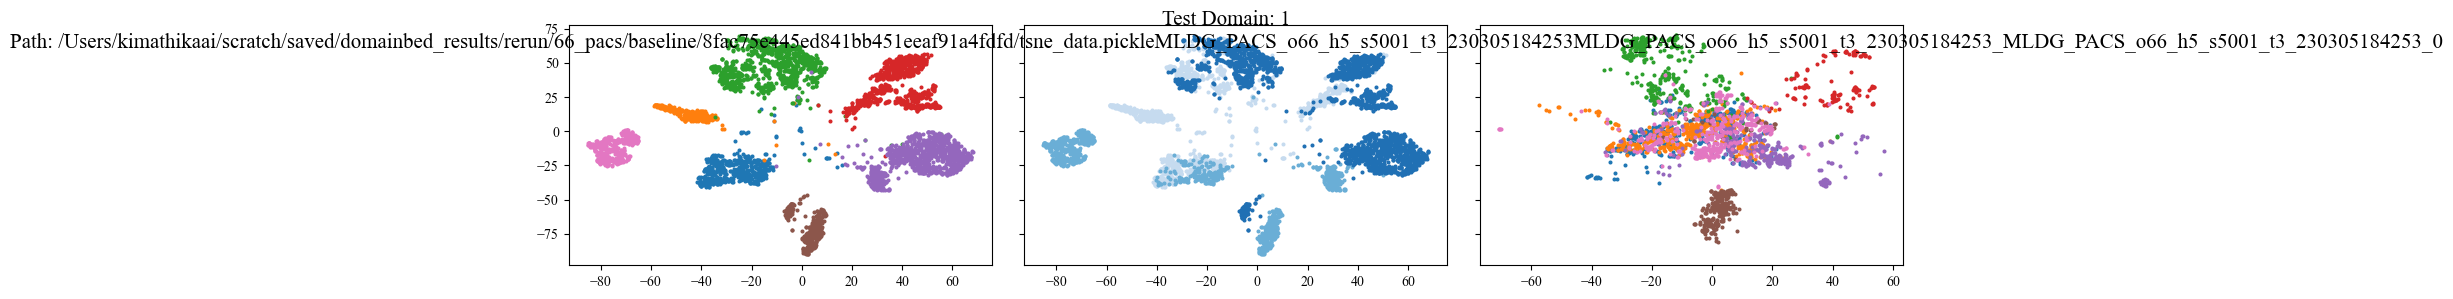

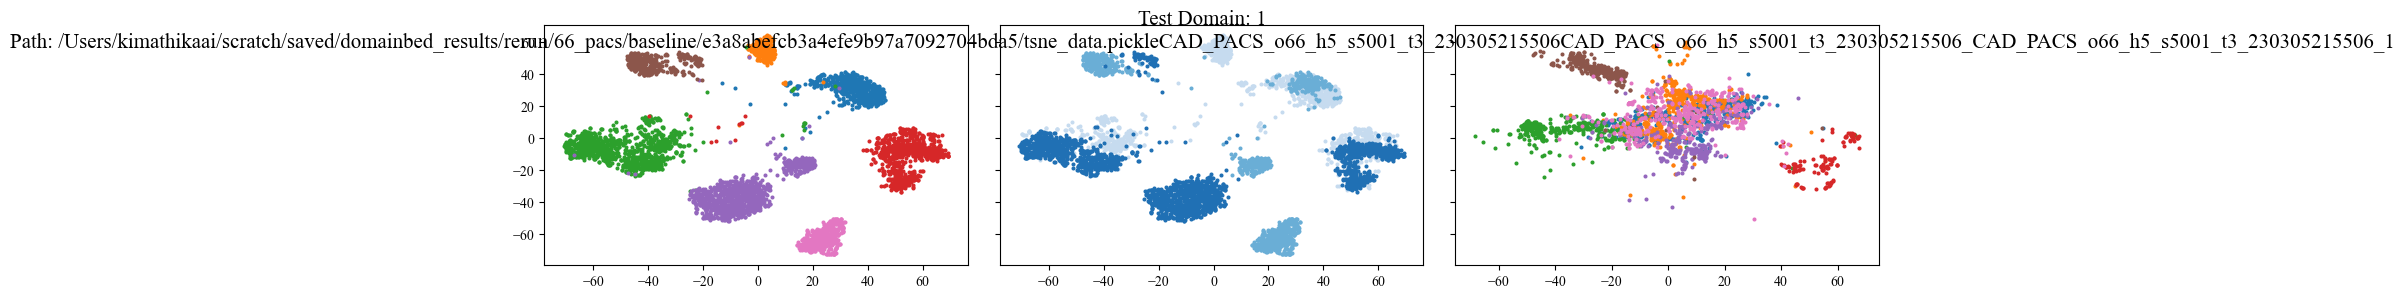

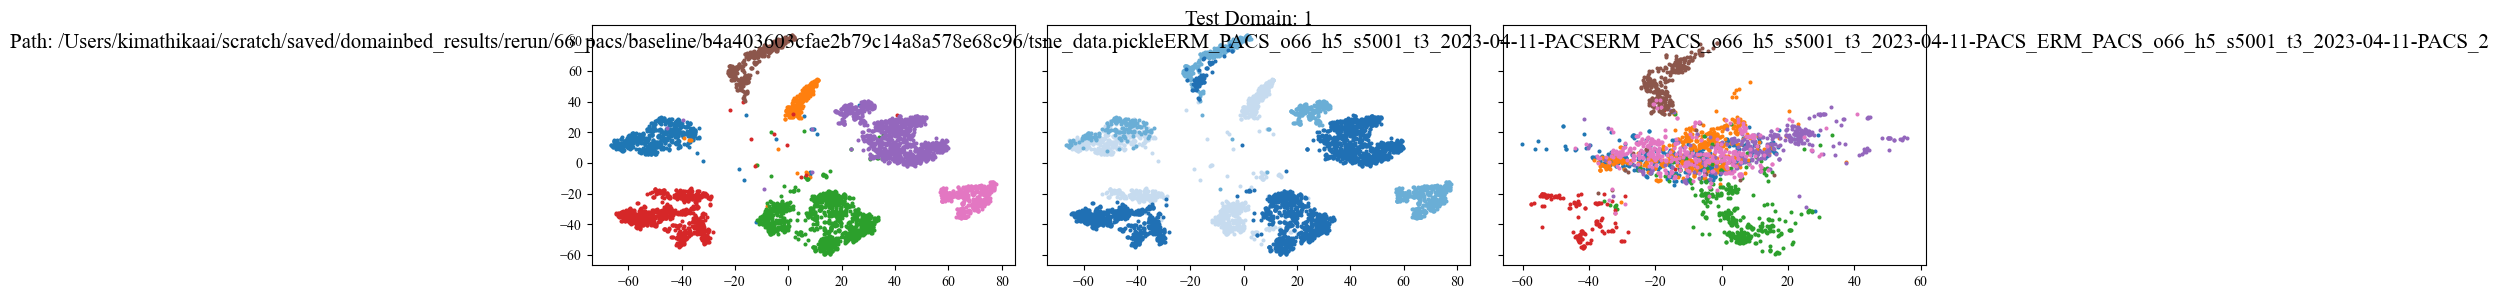

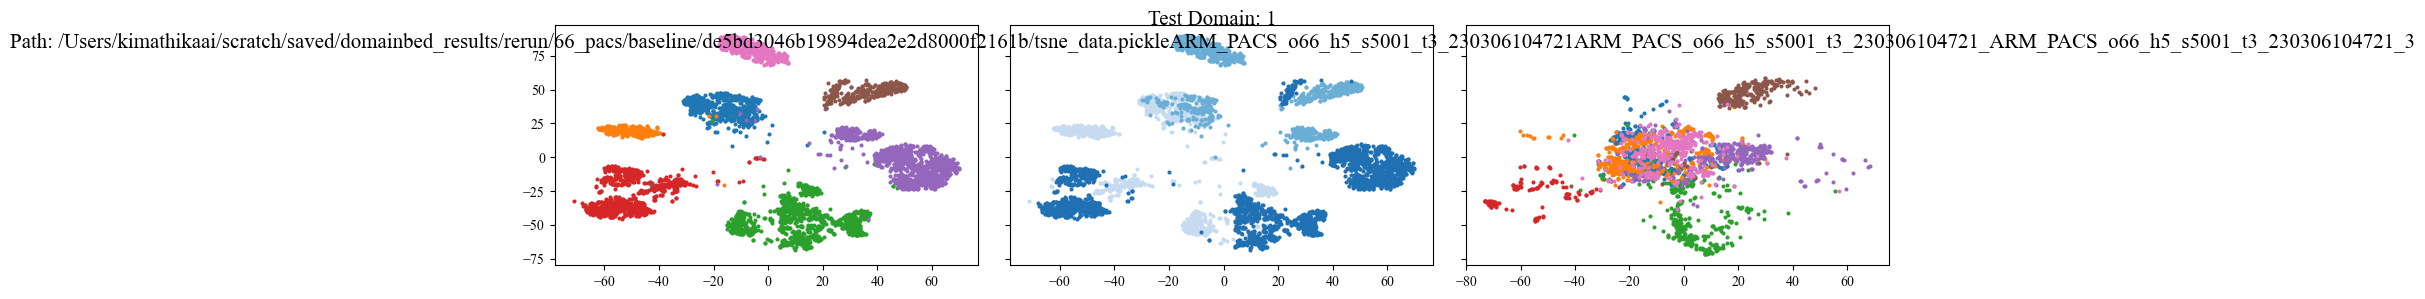

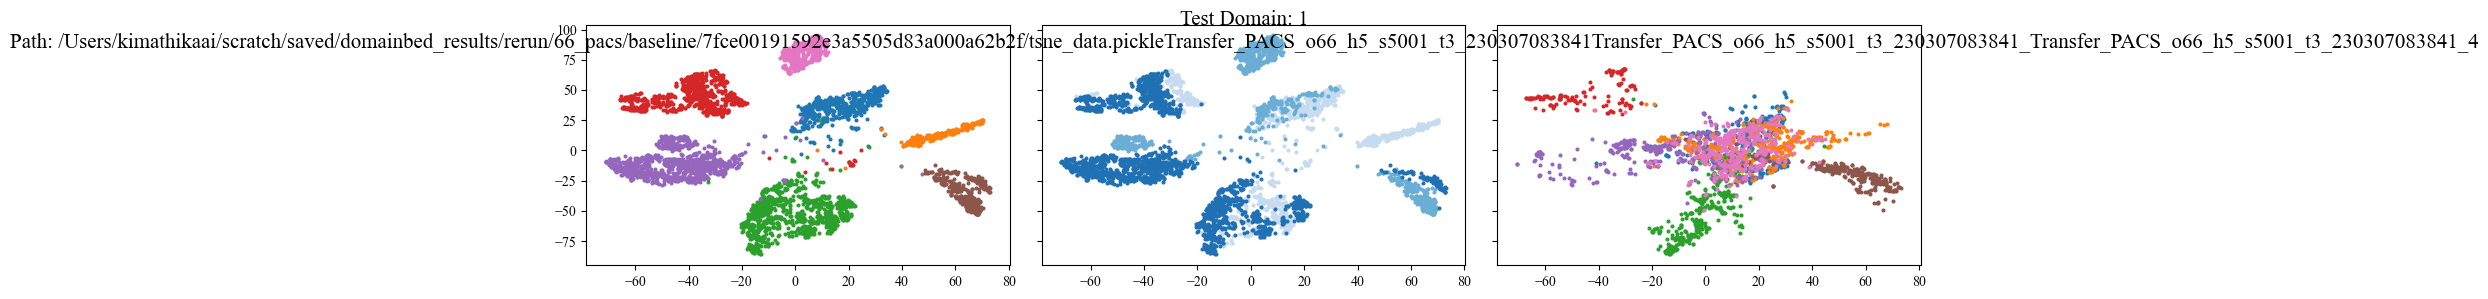

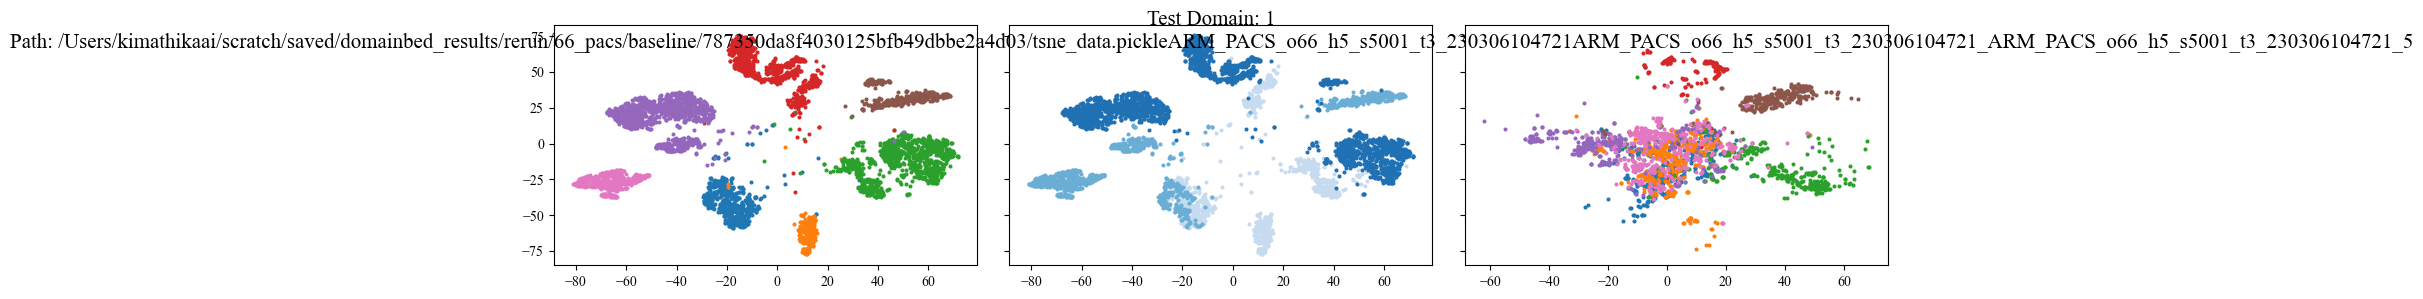

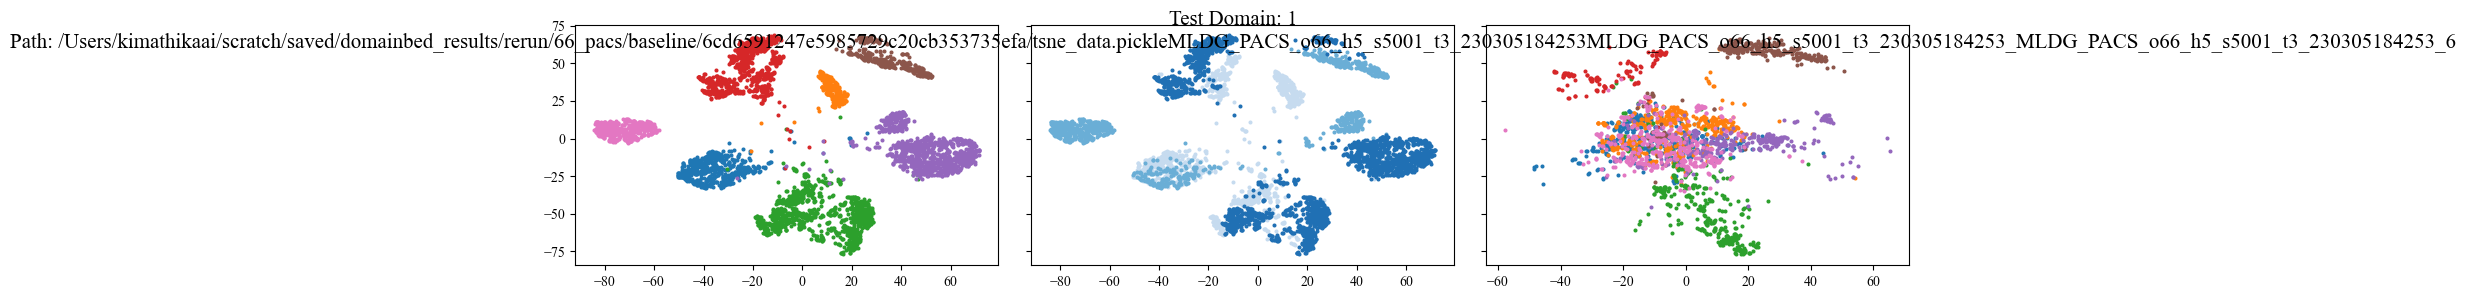

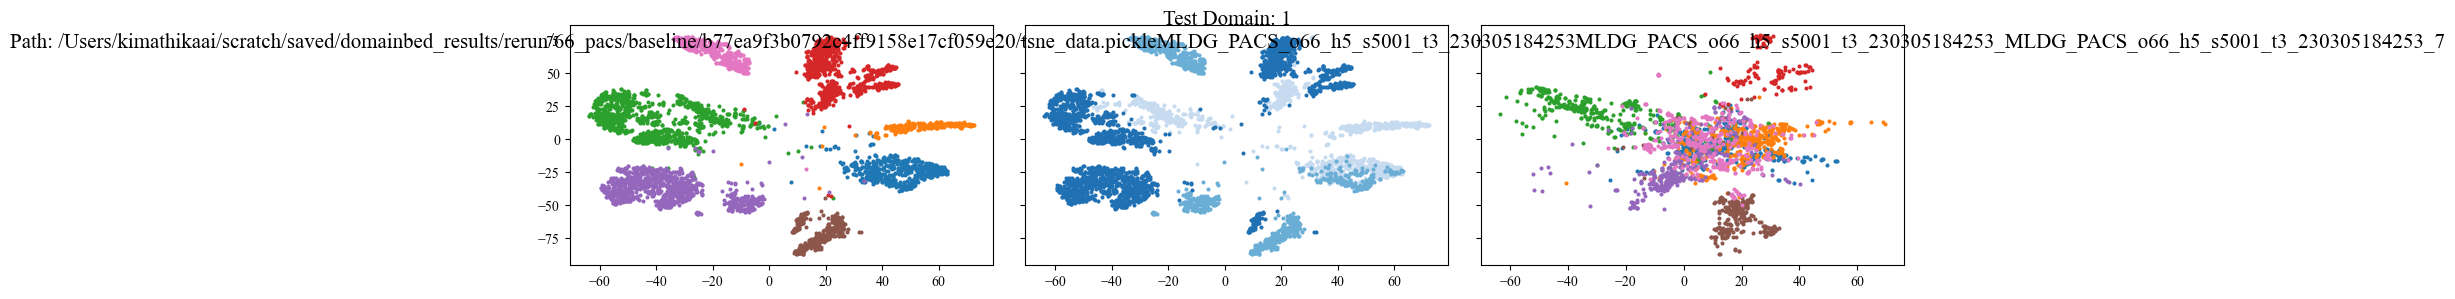

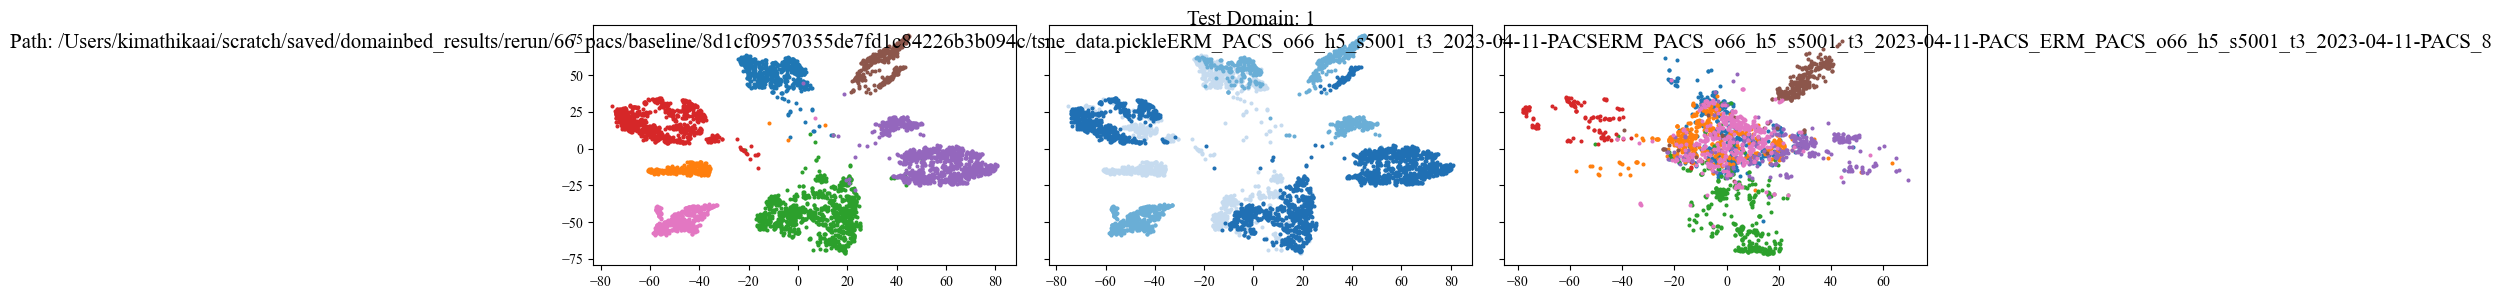

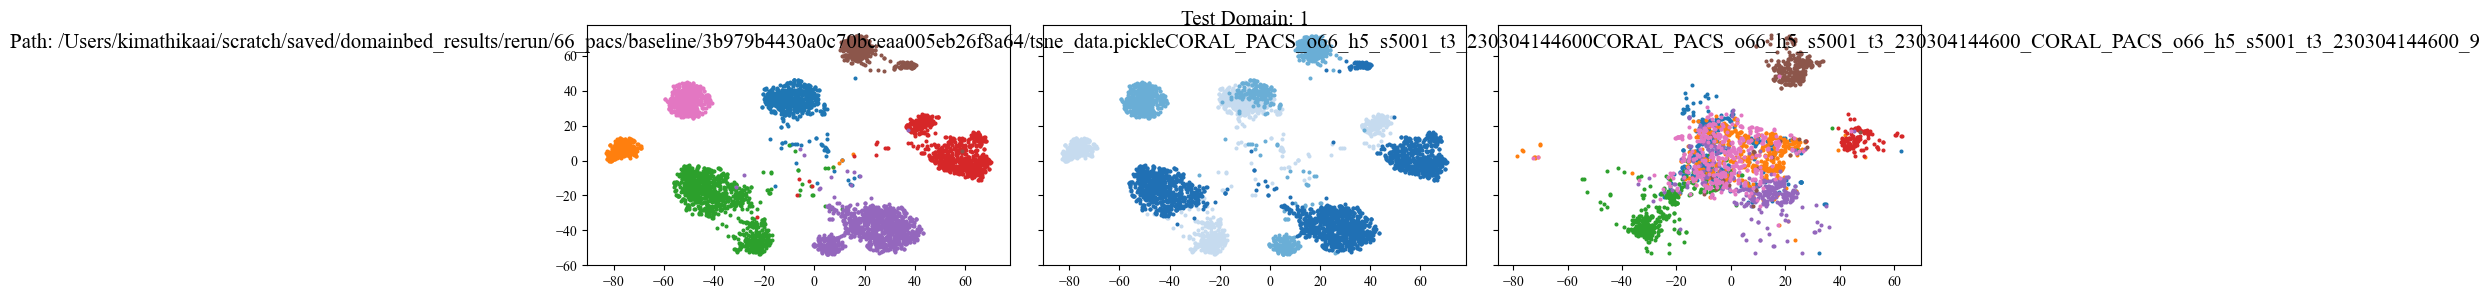

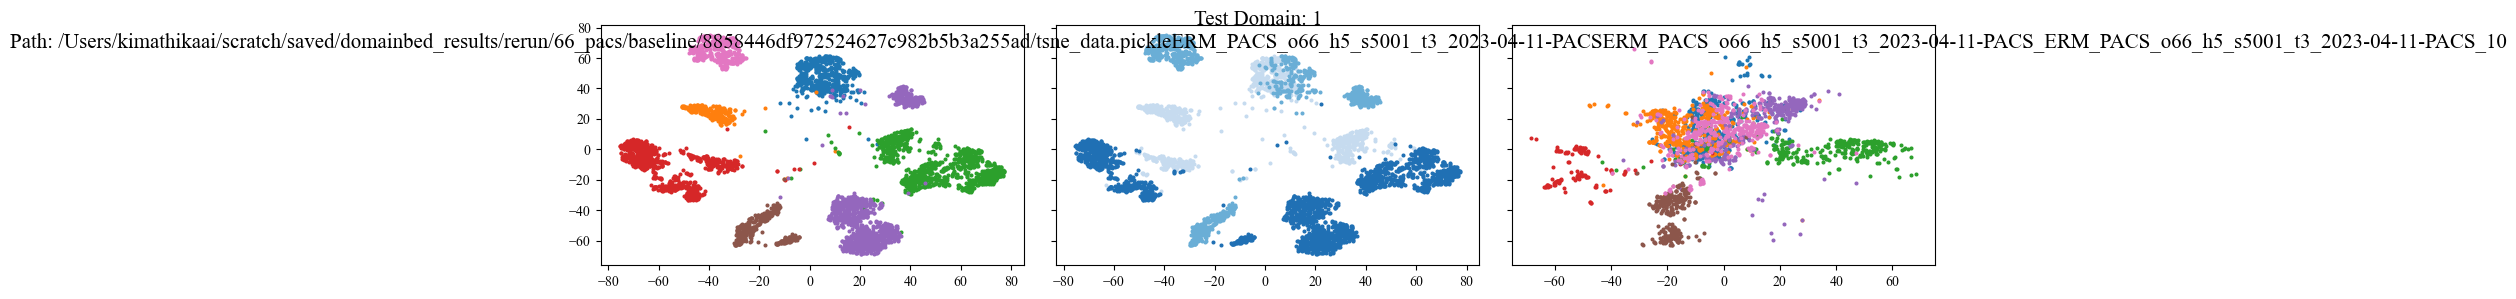

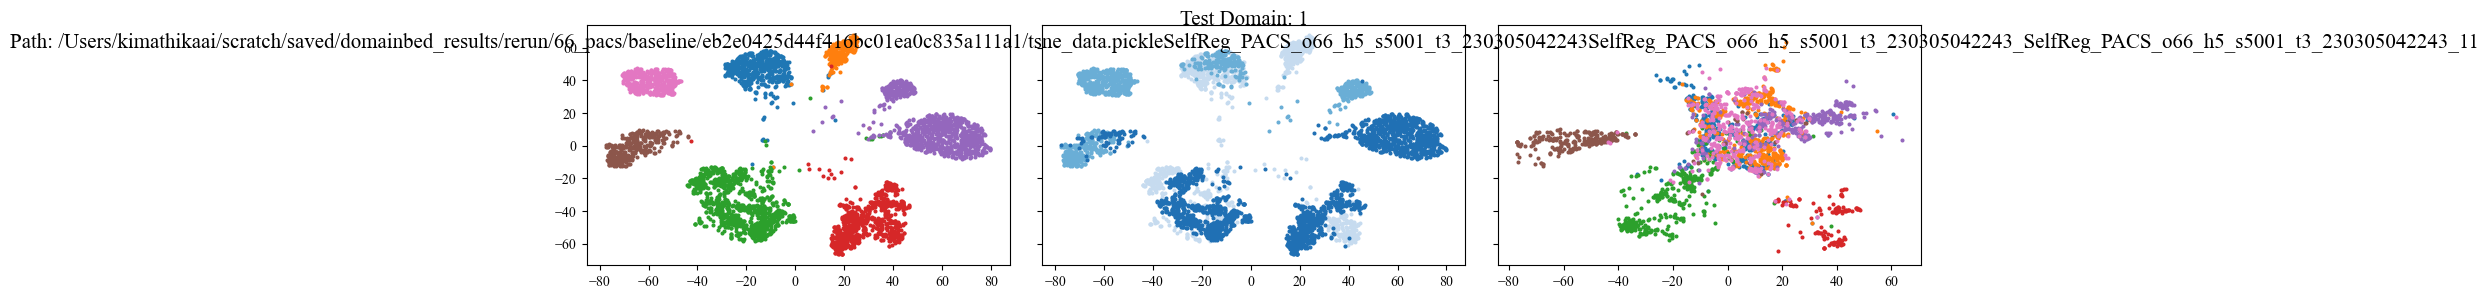

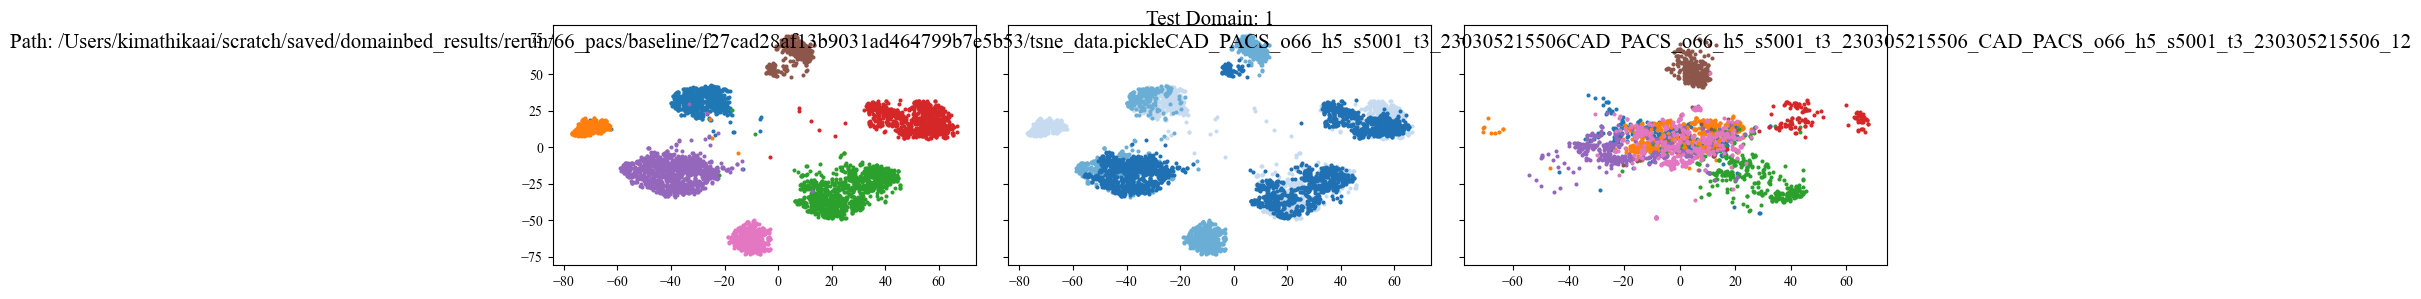

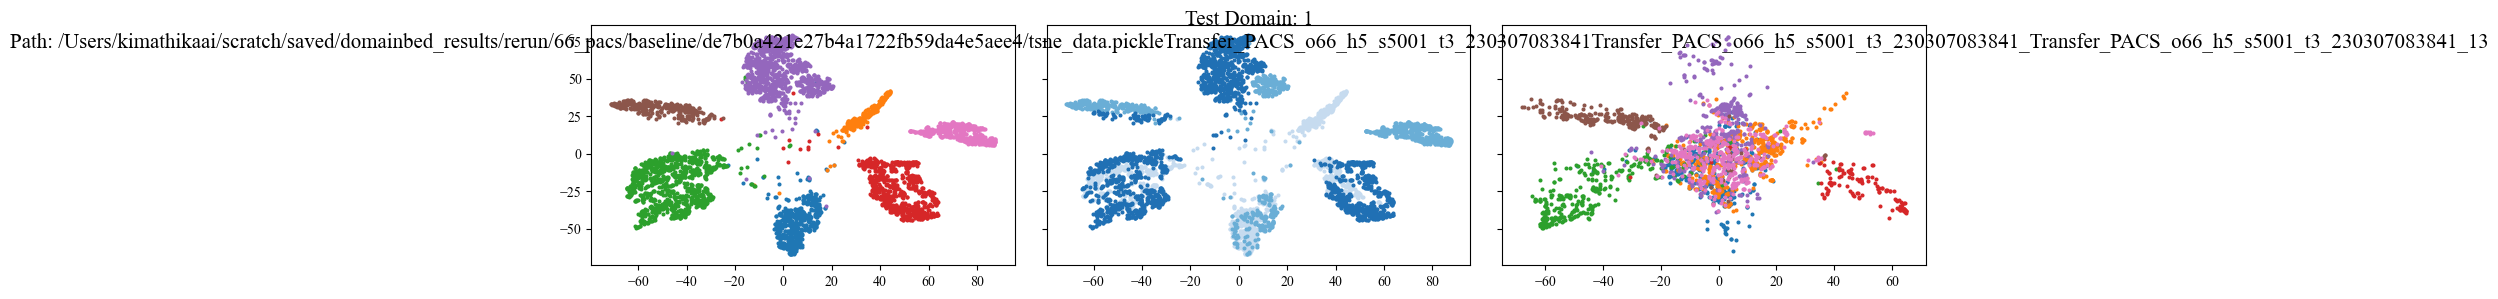

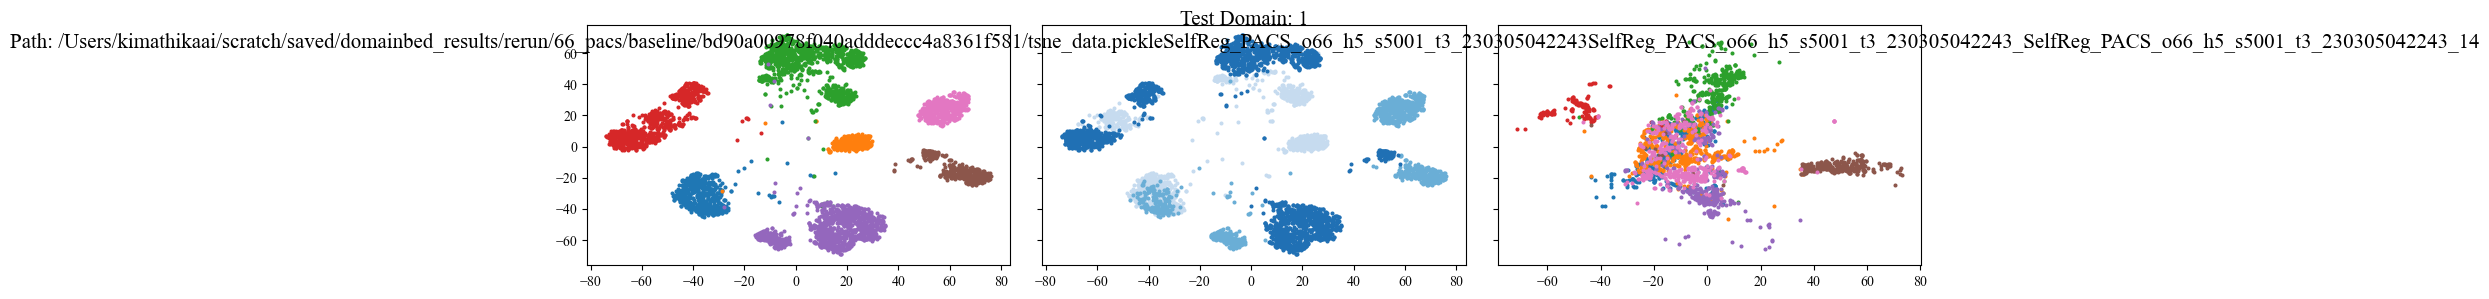

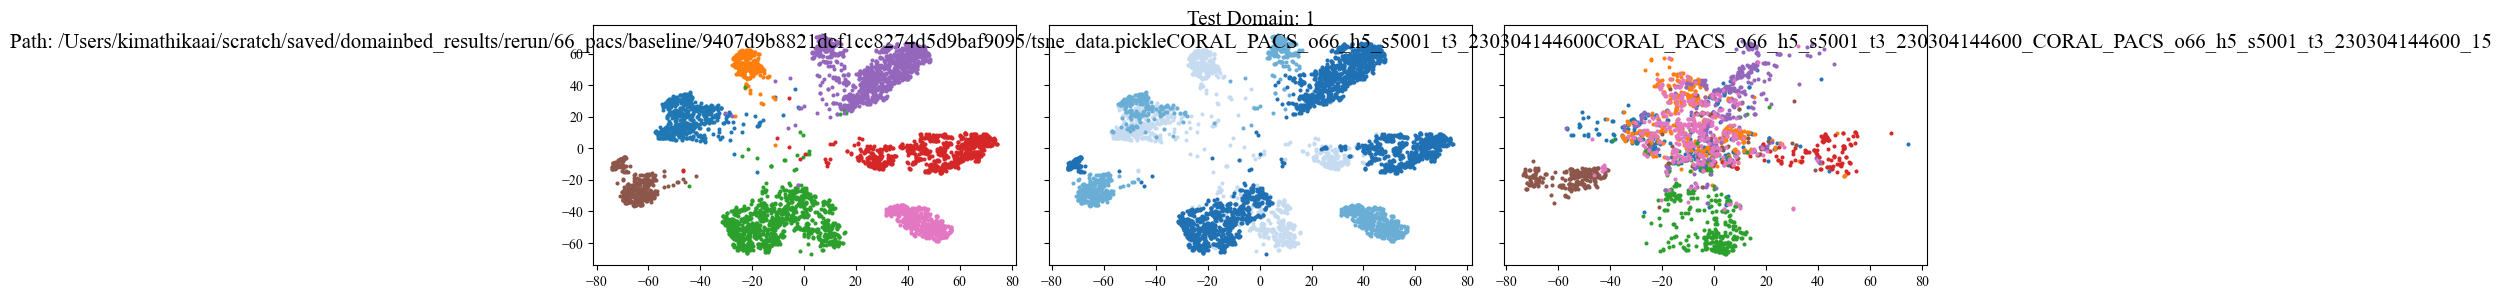

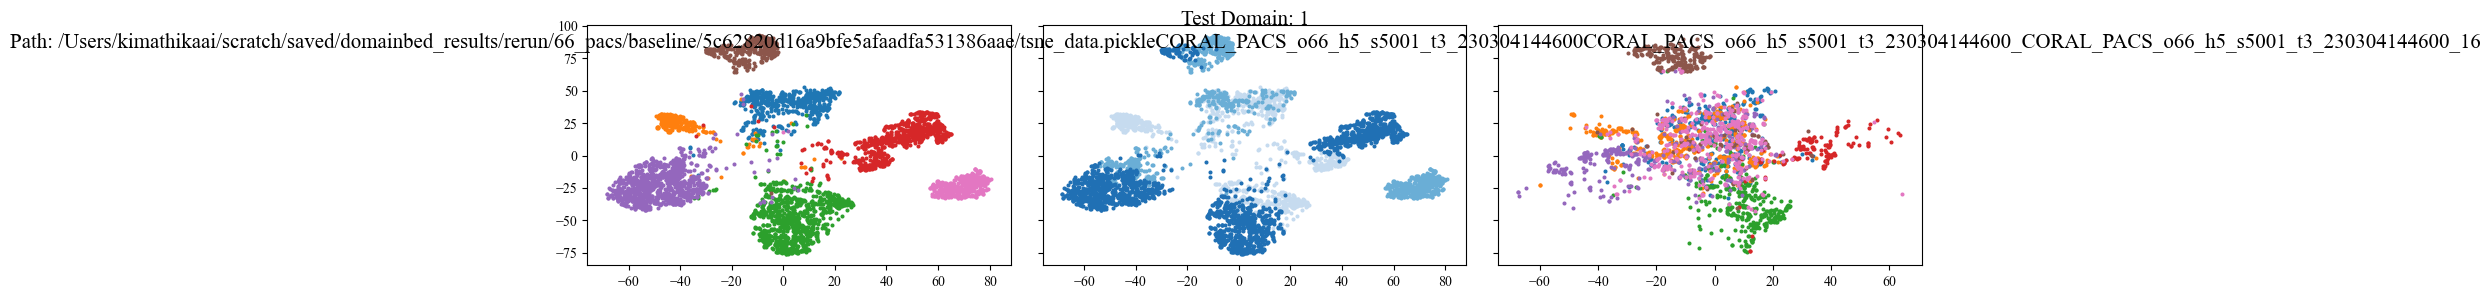

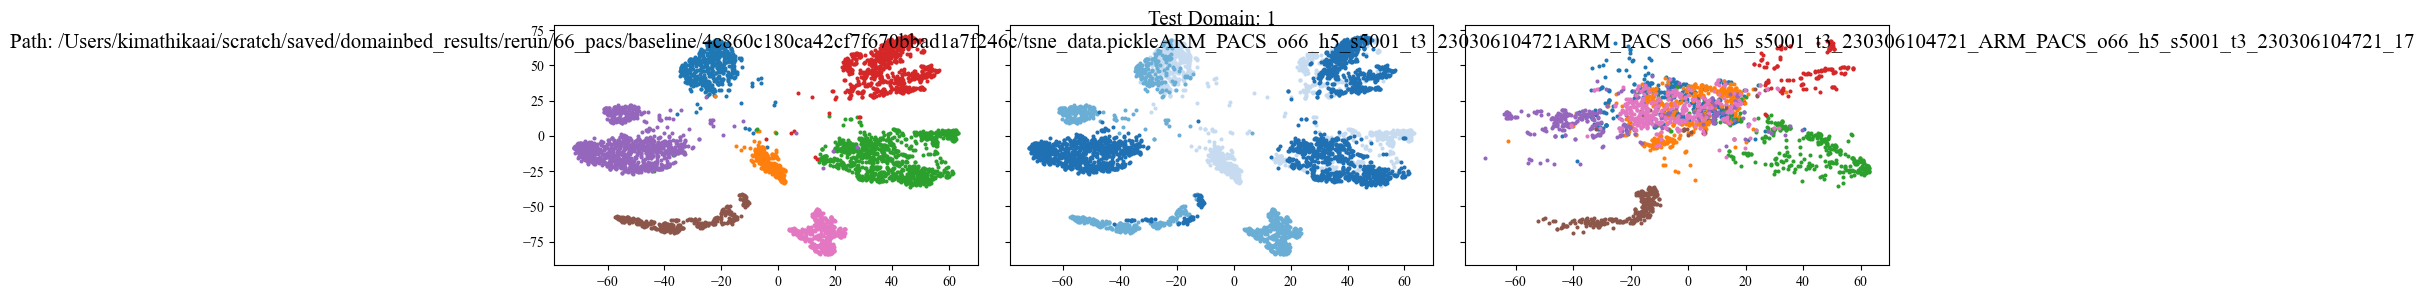

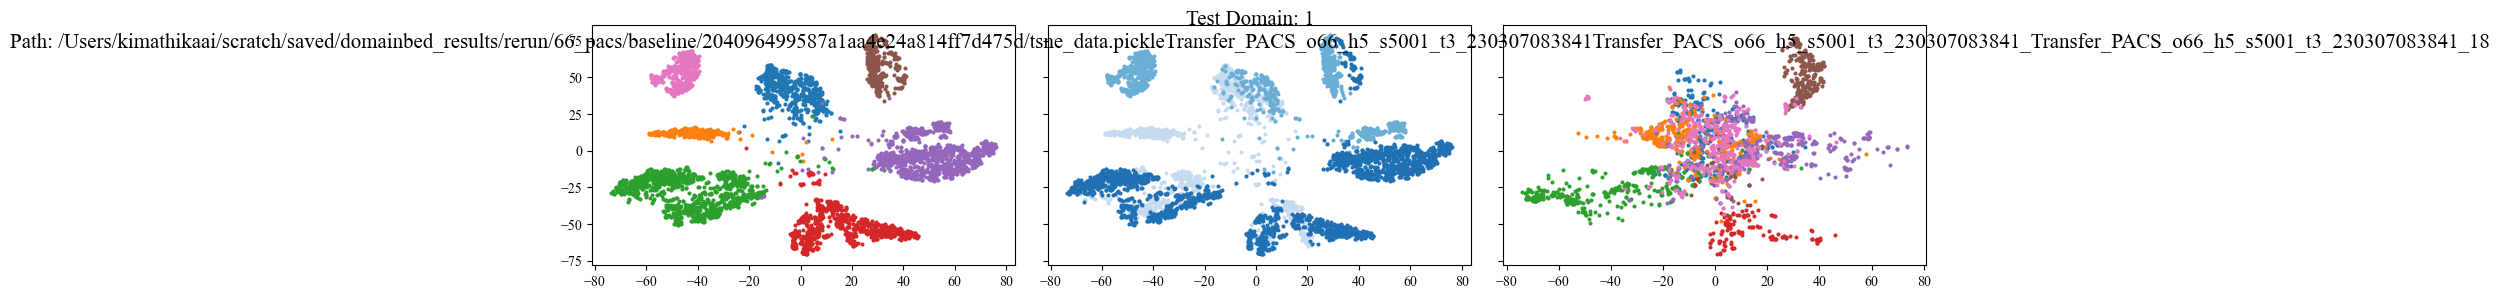

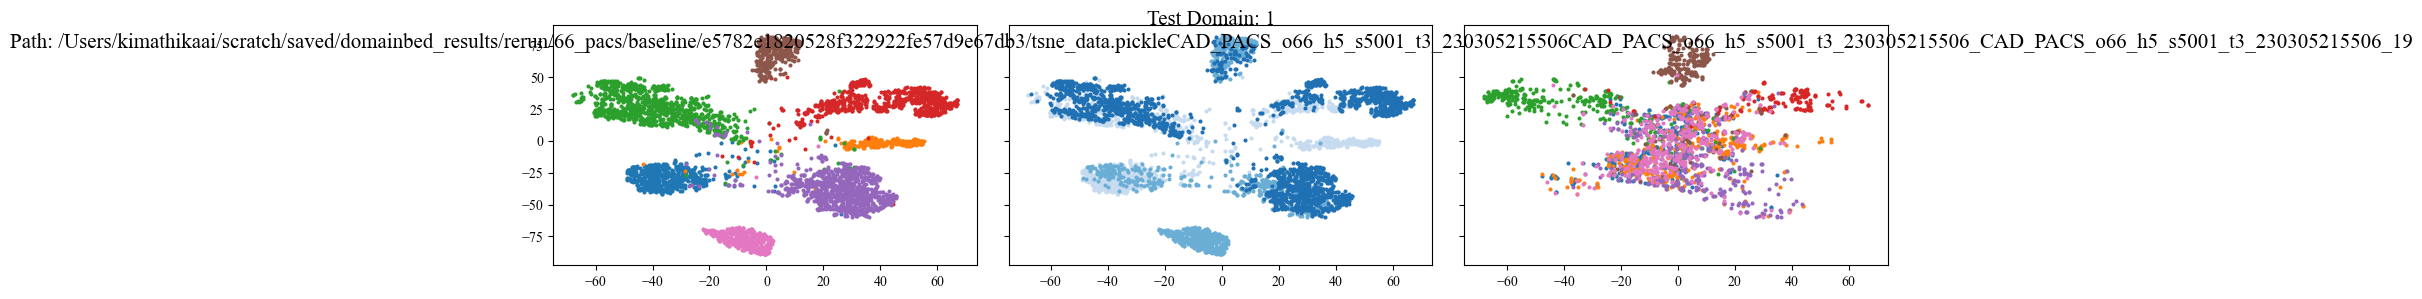

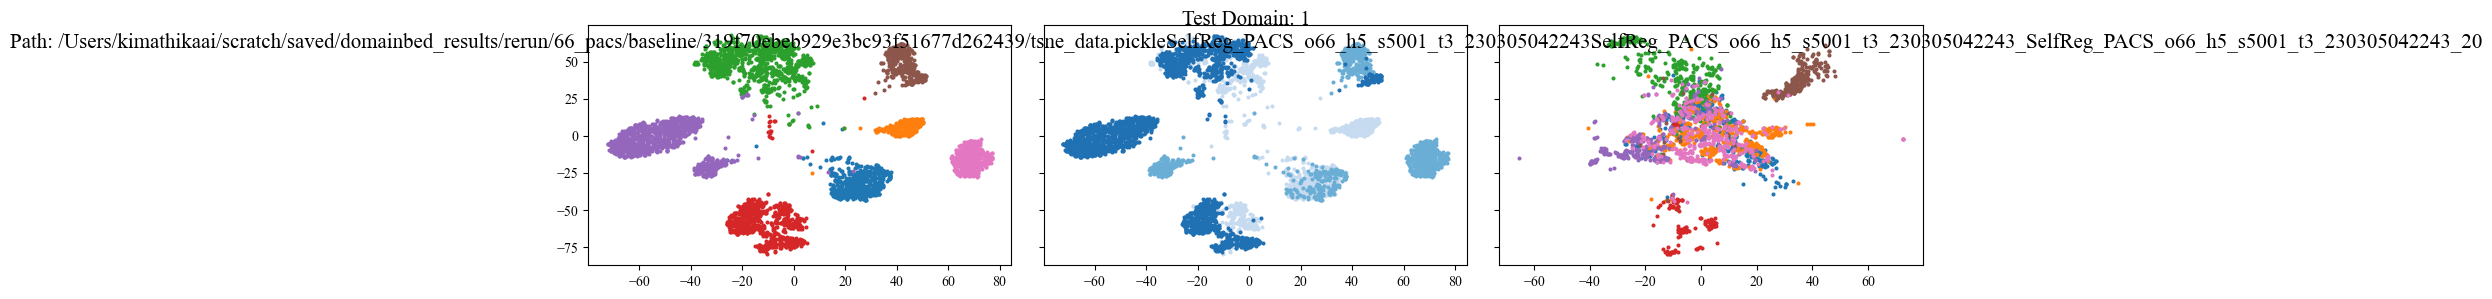

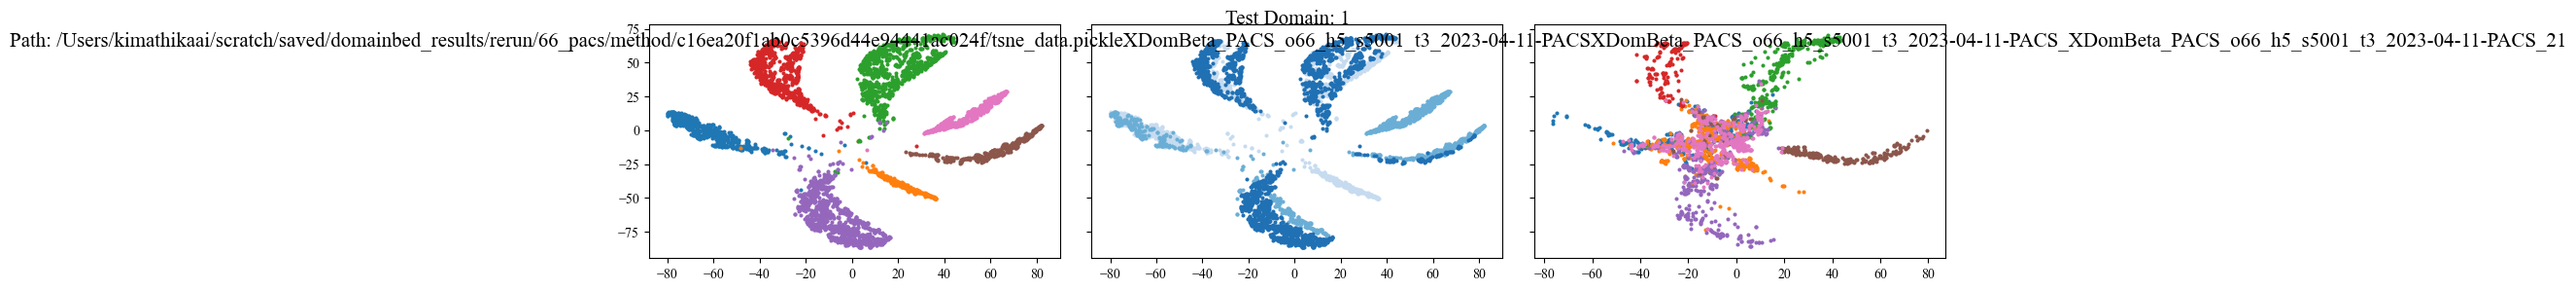

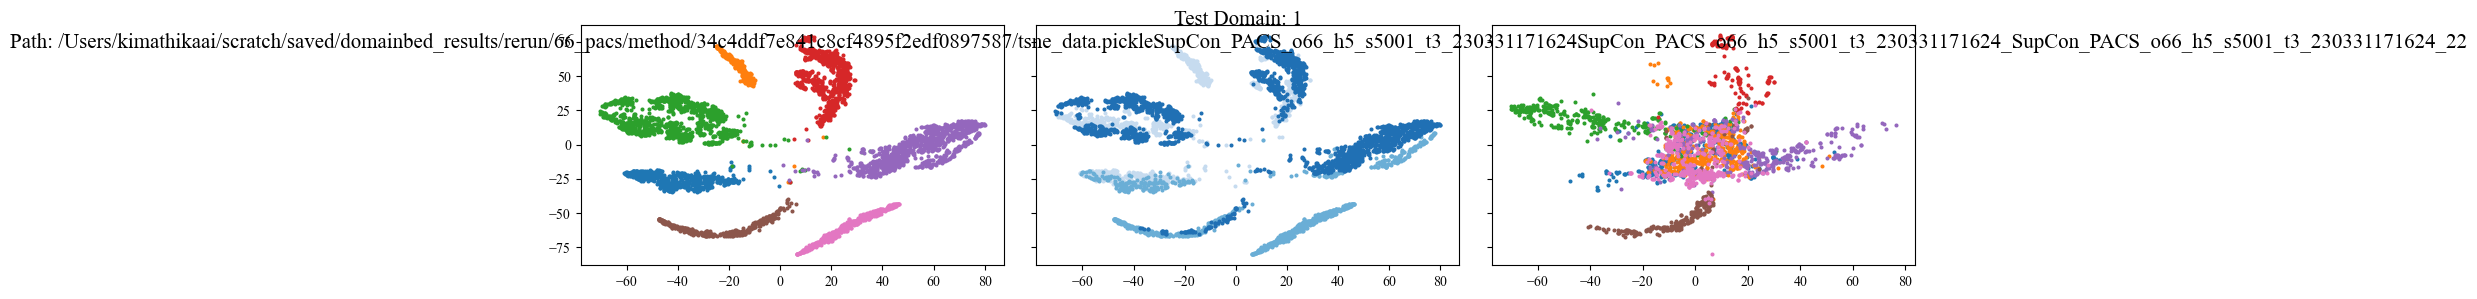

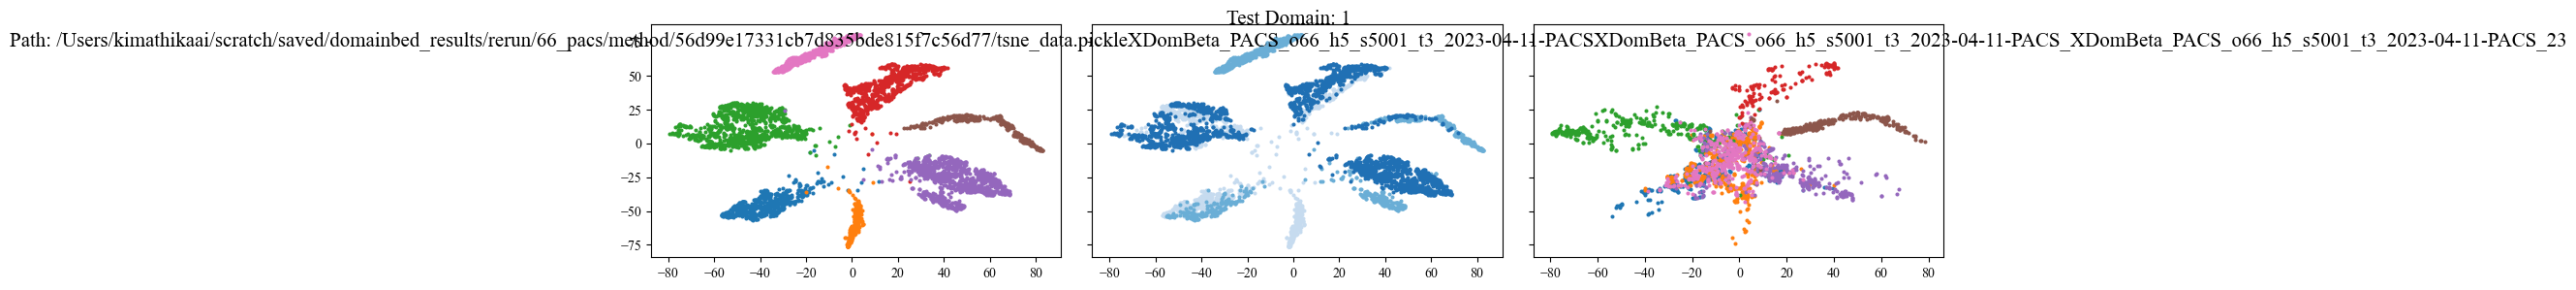

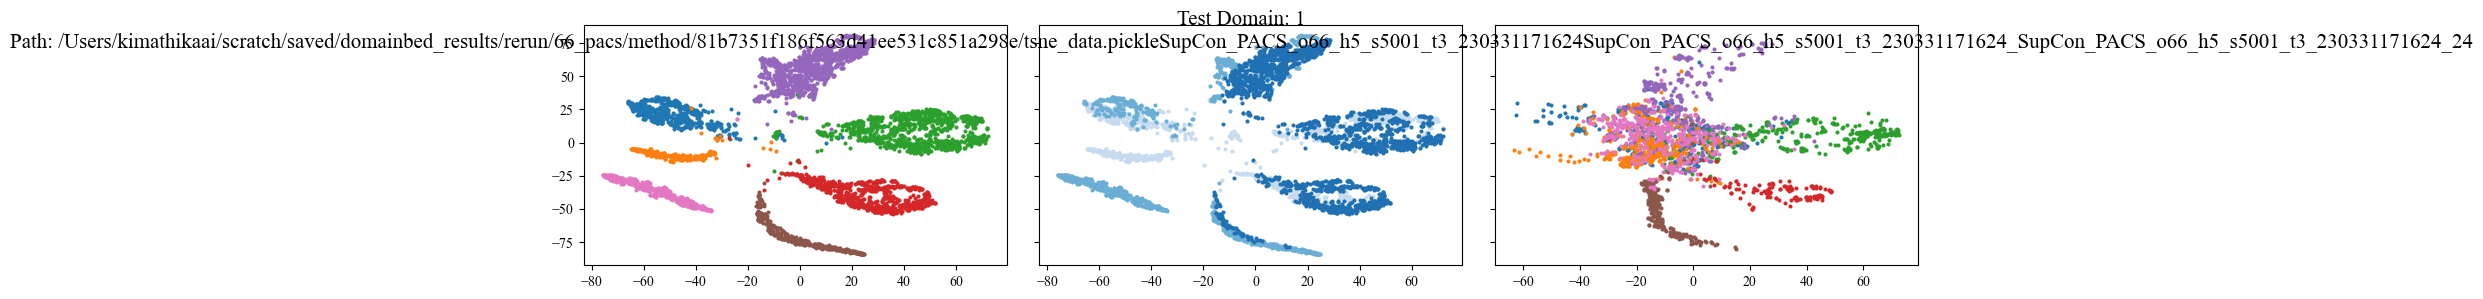

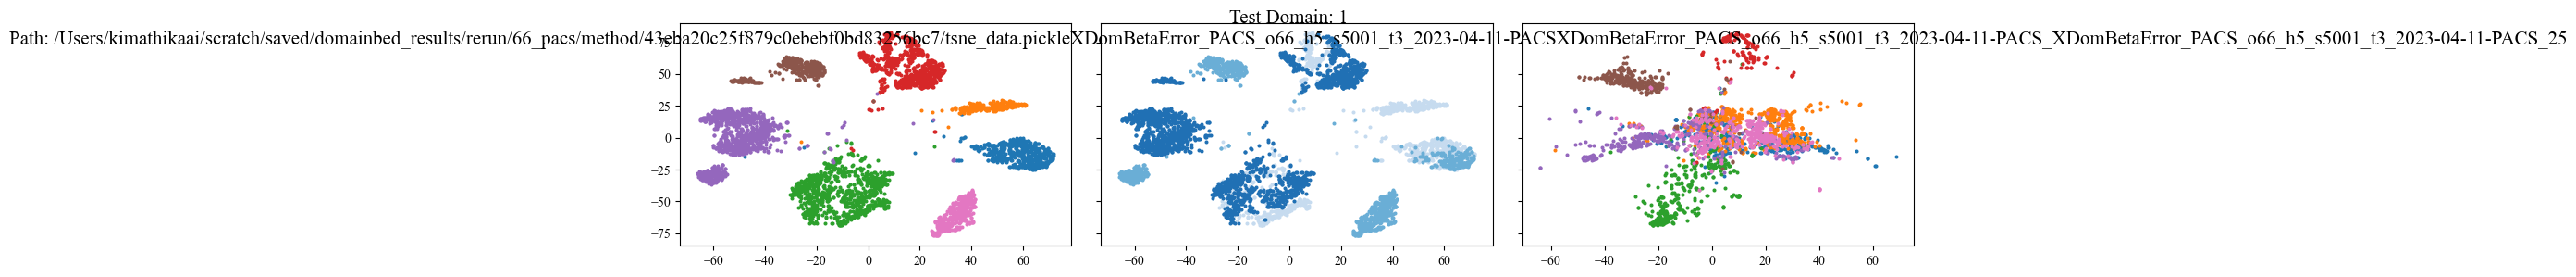

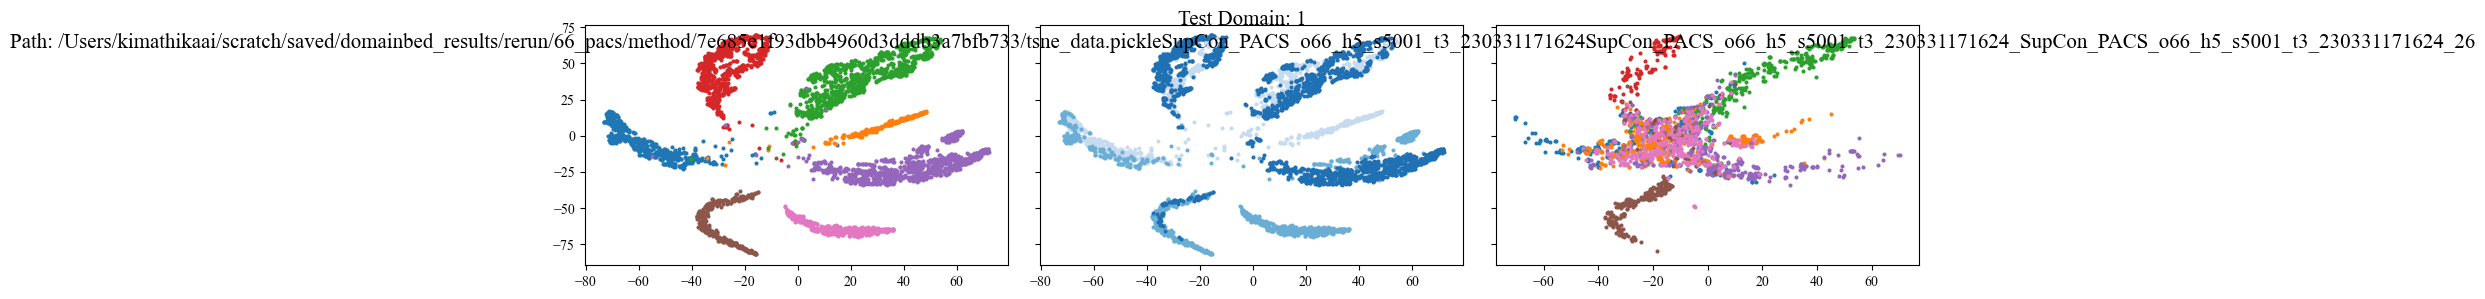

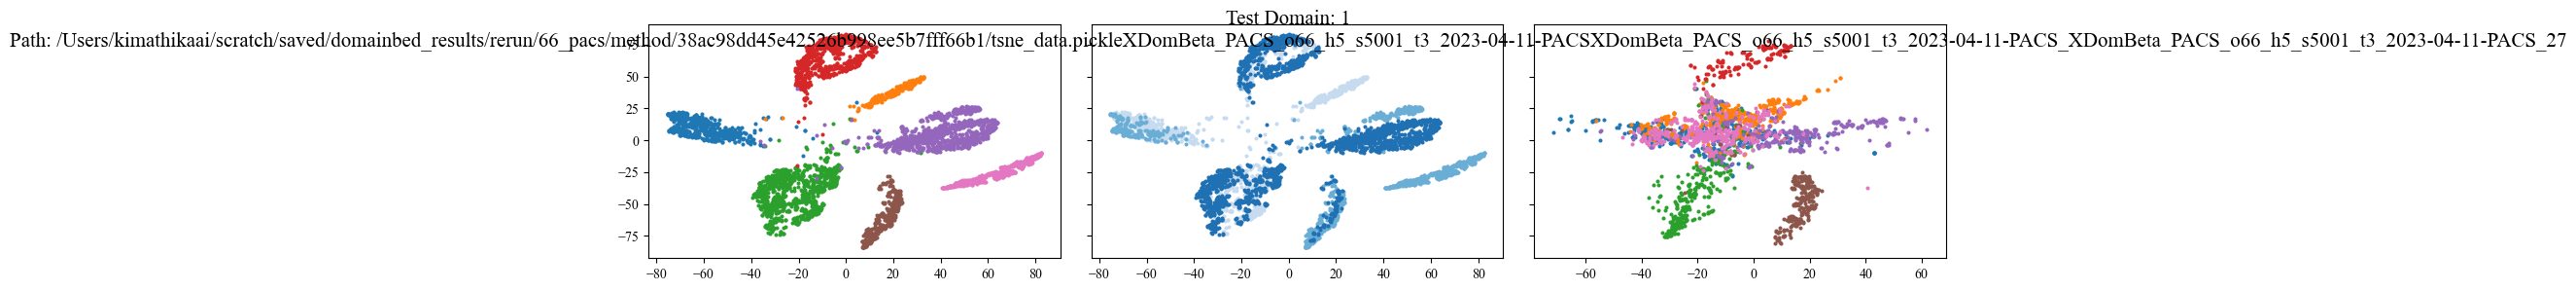

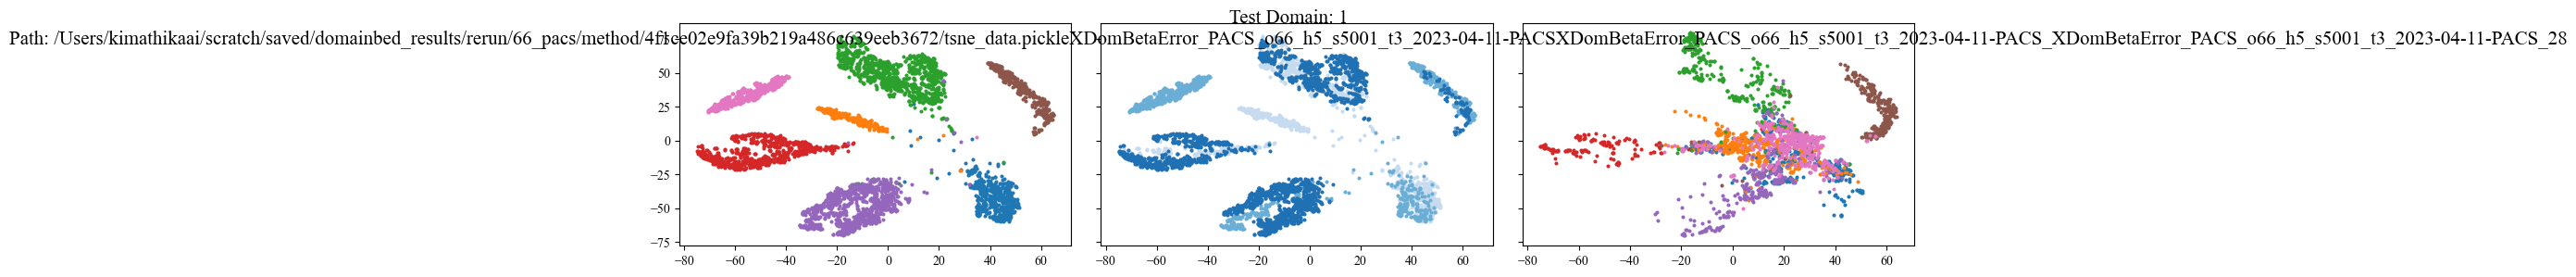

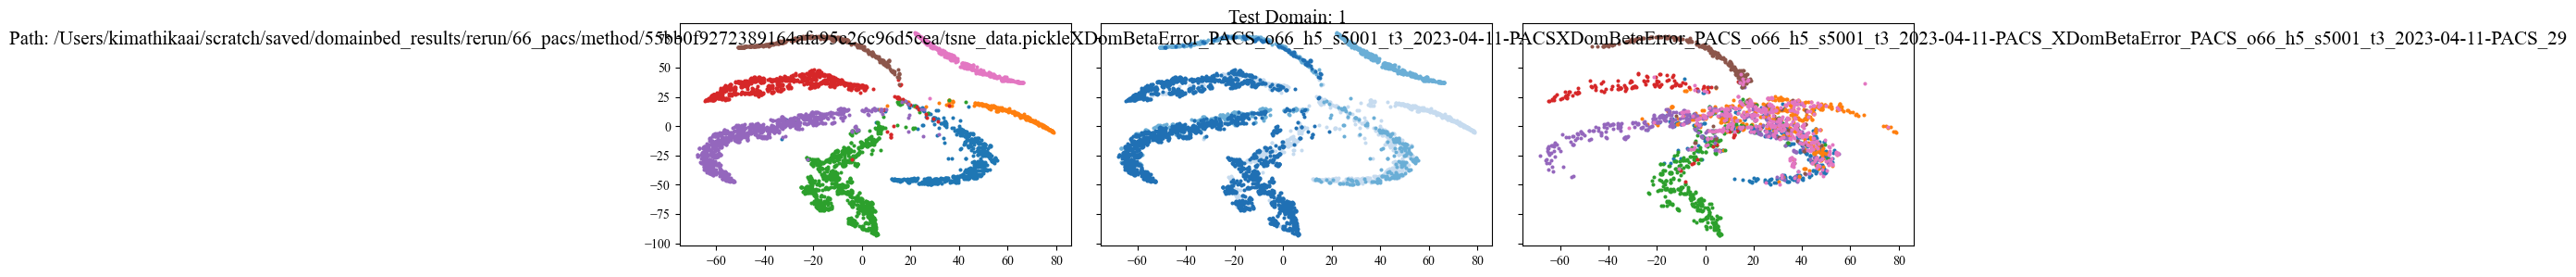

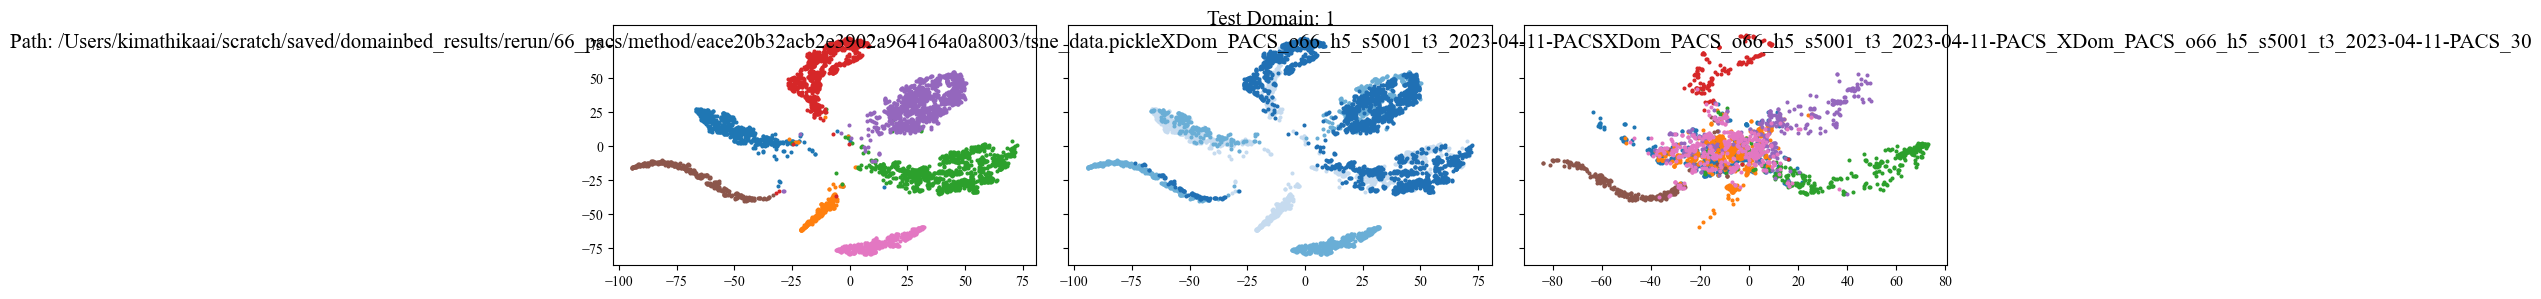

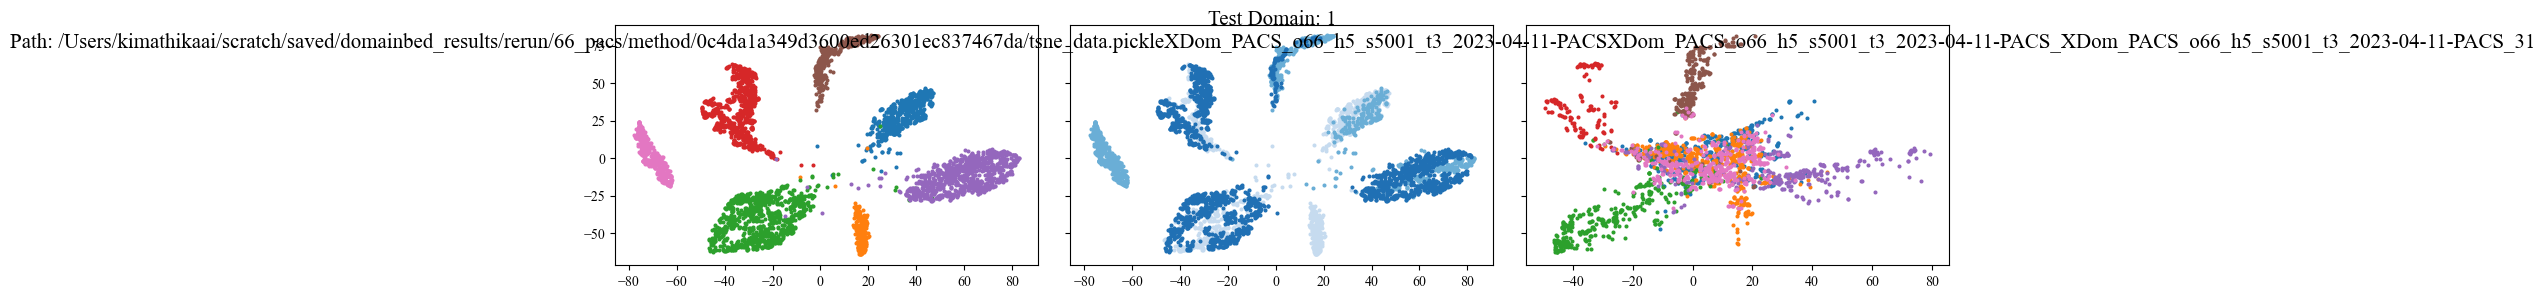

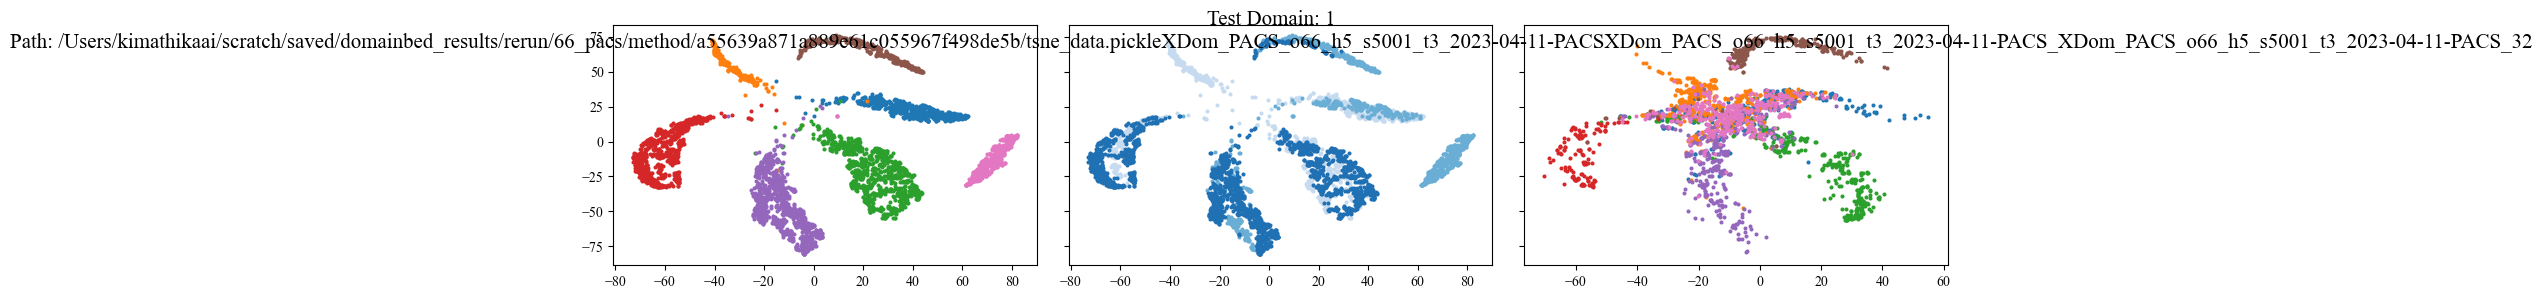

In [11]:
# plot tsne's
t1_tsne = [(x[0],x[1]+'_'+y.split('/')[0]+'_'+str(i)) for i,(x,y) in enumerate(zip(t1_tsne,t1_folders))]
utils.plot_embeddings(t1_tsne)
# save tsne
# from time import time
# t1_tsne.to_csv(f't1_tsne_{int(time.now)}.csv')

## Transfer

Number of plots:  1


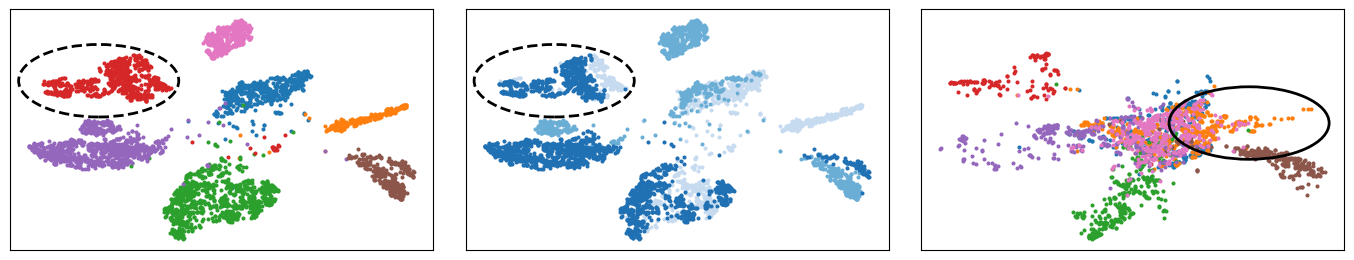

In [35]:
algorithm="transfer"
fig, axes = utils.plot_embeddings(t1_tsne[4], single_plot=True)
# save tsne
#t1_tsne[4][0].to_csv(os.path.join(FILE_SAVE, f'df_tsne_{algorithm}.csv'))

# LEGEND
# domain_legend = axes[1].get_legend_handles_labels()
# class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((45, 10), 30, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((-45, 45), 30, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((-45, 45), 30, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}.pdf'), bbox_inches='tight', format='pdf')

## CAD

Number of plots:  1


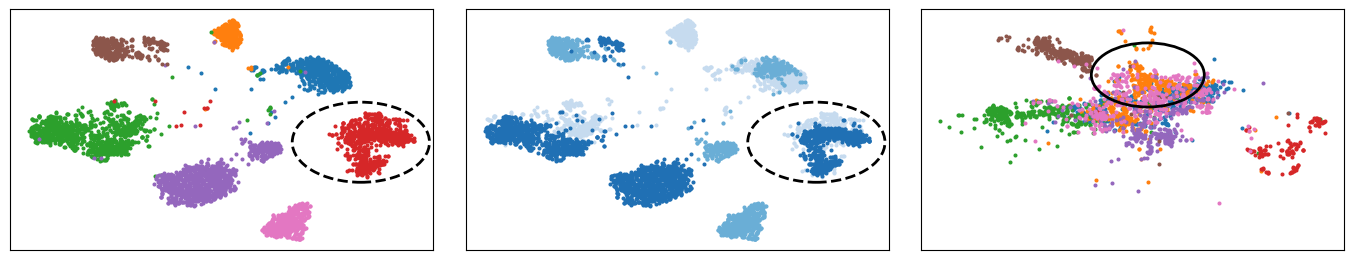

In [45]:
algorithm="cad"
fig, axes = utils.plot_embeddings(t1_tsne[1], single_plot=True)
# save tsne
#t1_tsne[1][0].to_csv(os.path.join(FILE_SAVE, f'df_tsne_{algorithm}.csv'))

# LEGEND
# domain_legend = axes[1].get_legend_handles_labels()
# class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((5, 30), 20, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((50, -12), 25, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((50, -12), 25, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}.pdf'), bbox_inches='tight', format='pdf')

## SelfReg

Number of plots:  1


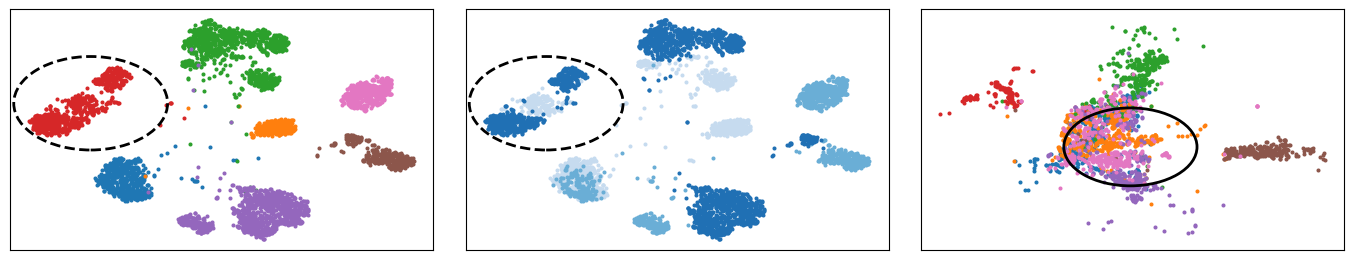

In [52]:
algorithm="selfreg"
fig, axes = utils.plot_embeddings(t1_tsne[14], single_plot=True)
# save tsne
# t1_tsne[14][0].to_csv(os.path.join(FILE_SAVE, f'df_tsne_{algorithm}.csv'))

# LEGEND
# domain_legend = axes[1].get_legend_handles_labels()
# class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((0, -10), 25, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((-50, 18), 30, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((-50, 18), 30, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}.pdf'), bbox_inches='tight', format='pdf')

## CORAL

Number of plots:  1


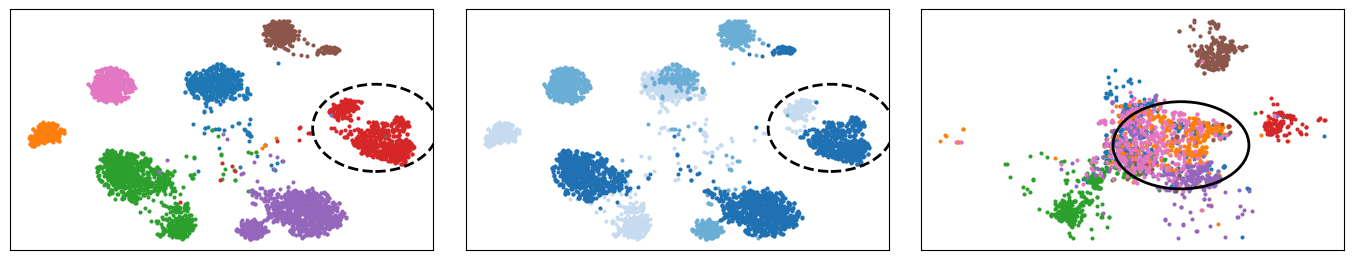

In [58]:
algorithm="coral"
fig, axes = utils.plot_embeddings(t1_tsne[9], single_plot=True)
# save tsne
#t1_tsne[9][0].to_csv(os.path.join(FILE_SAVE, f'df_tsne_{algorithm}.csv'))

# LEGEND
# domain_legend = axes[1].get_legend_handles_labels()
# class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((10,0), 25, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((55, 10), 25, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((55, 10), 25, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}.pdf'), bbox_inches='tight', format='pdf')

## MLDG

In [ ]:
algorithm="mldg"
fig, axes = utils.plot_embeddings(t1_tsne[0], single_plot=True)
# save tsne
#t1_tsne[0][0].to_csv(os.path.join(FILE_SAVE, f'df_tsne_{algorithm}.csv'))

# LEGEND
# domain_legend = axes[1].get_legend_handles_labels()
# class_legend = axes[0].get_legend_handles_labels()

circle = plt.Circle((-10, 0), 30, fill=False, linewidth=2)
axes[2].add_artist(circle)

circle = plt.Circle((39, 35), 30, fill=False, linewidth=2, linestyle='--')
axes[0].add_artist(circle)
circle = plt.Circle((39, 35), 30, fill=False, linewidth=2, linestyle='--')
axes[1].add_artist(circle)

for ax, name in zip(axes, ['source', 'domain', 'target']):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])

    ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                   left=False, right=False, labelbottom=False)
    # save each subplot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}_{name}.pdf'),
               bbox_inches=extent.expanded(1.1,1.1))
    
fig.savefig(os.path.join(FILE_SAVE, f'tsne_pacs_{algorithm}.pdf'), bbox_inches='tight', format='pdf')

Number of plots:  1
